In [1]:
#Import everything
import Main.test_manifold_algorithms as tma
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Helpers.regression_helpers import *

# Baseline Visualization

In [ ]:
pipeline_baselines = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/ManifoldData/PipelineBasline.csv", index_col=0).rename(columns = {"Method": "method"})
pipeline_baselines.sample(5)

,csv_file,method,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE)
0,EnergyEfficiency.csv,Pipeline Baseline,0.969571,0.966049,0.894425,0.317583,0.180095
17,AirfoilSelfNoise.csv,Pipeline Baseline,0.929307,0.945727,0.656316,0.625202,0.248446
61,ComputerHardware.csv,Pipeline Baseline,0.891066,0.869636,0.745370,0.288621,0.206515
7,ConcreteSlumpTest.csv,Pipeline Baseline,0.773038,0.864678,0.773519,0.447906,0.346222
49,ConcreteSlumpTest.csv,Pipeline Baseline,0.752889,0.760095,0.822802,0.454278,0.528583


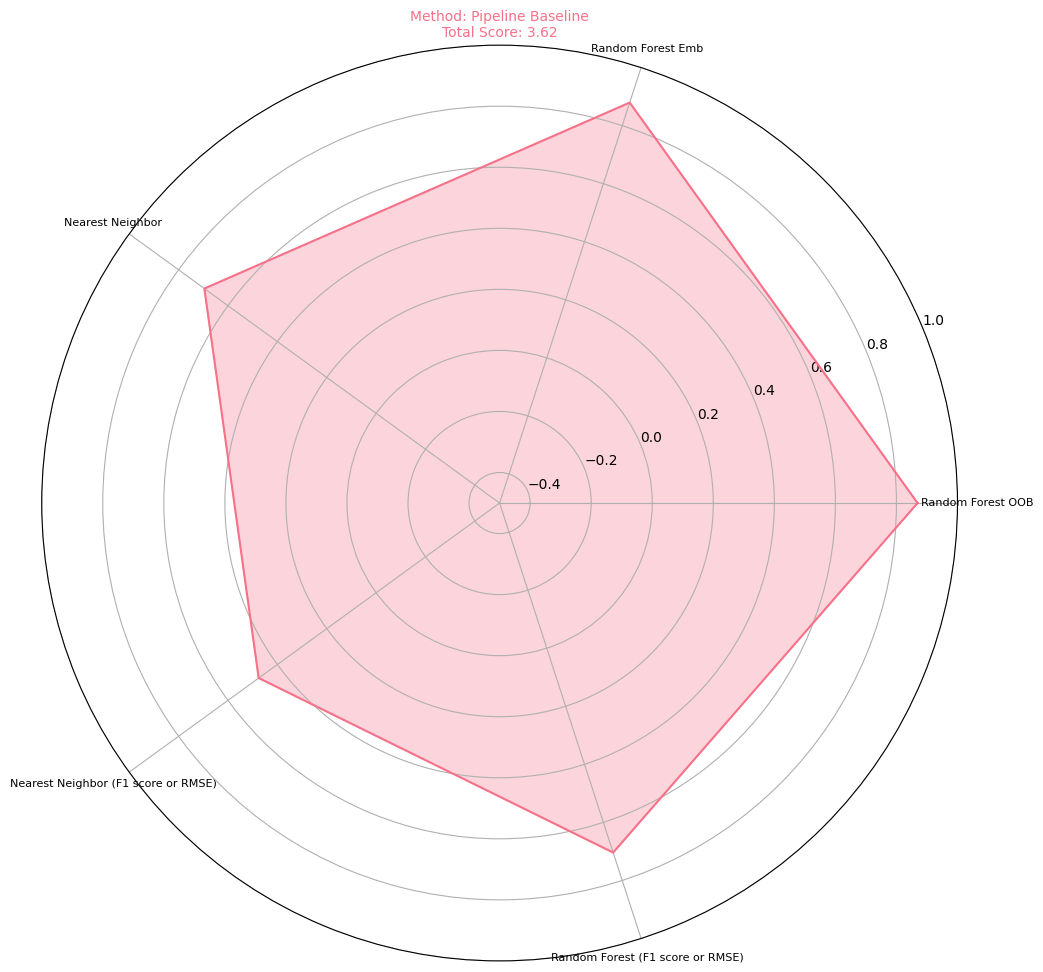

In [3]:
plot_radial(pipeline_baselines, ['Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor',
                          'Nearest Neighbor (F1 score or RMSE)', 'Random Forest (F1 score or RMSE)'])

In [4]:
baselines_cross = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData/BaselineData.csv")
baselines_in_sample = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData/BaselineDataOnSample.csv")
baselines = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData/BaselineDataTrainTest.csv", index_col=0).rename(columns = {"KNN_BL_A": "A_Classification_Score", "KNN_BL_B": "B_Classification_Score"})
baselines.sample(5)

,csv_file,split,KNN,A_Classification_Score,B_Classification_Score
648,ConcreteCompressiveStrength,distort,170,0.399632,0.359372
390,FacebookMetrics,distort,2,0.660574,0.806380
197,CommunityCrime,distort,282,0.495707,0.496604
251,OpticalNetwork,turn,15,0.708064,0.708064
652,AirfoilSelfNoise,distort,64,0.618199,0.569388


In [5]:
baselines_grouped = baselines.groupby(by = ["csv_file", "split"]).max().drop(columns = ["KNN"]).reset_index()
try:
    baselines_grouped.drop(columns = ["Unnamed: 0"], inplace= True)
except:
    print("Didn't need to run")

baselines_grouped[baselines_grouped["csv_file"] == "Hydrodynamics"]

Didn't need to run


,csv_file,split,A_Classification_Score,B_Classification_Score
45,Hydrodynamics,distort,0.731098,0.583344
46,Hydrodynamics,even,-0.132785,0.971827
47,Hydrodynamics,random,0.904653,-0.135059
48,Hydrodynamics,skewed,-0.134976,0.916070
49,Hydrodynamics,turn,0.731098,0.730979


<Axes: xlabel='csv_file'>

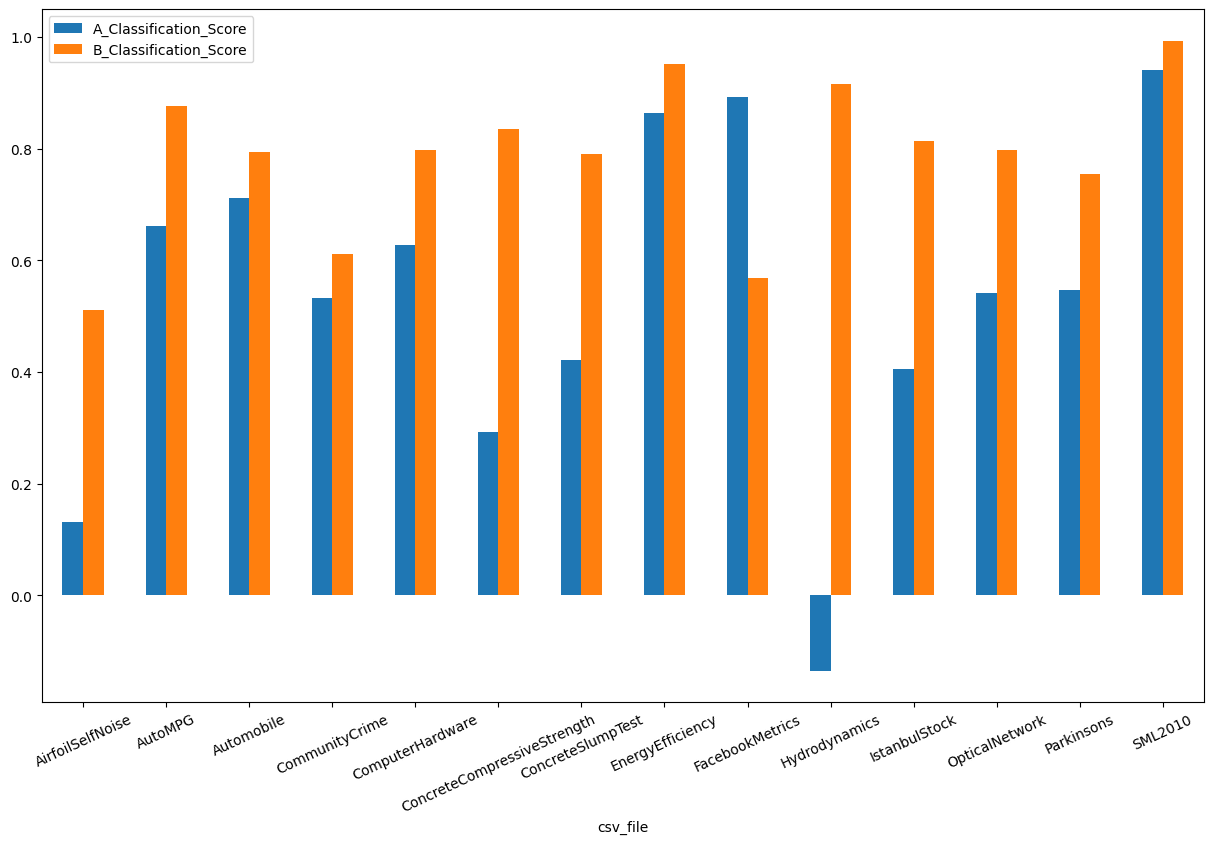

In [6]:
baselines_grouped[baselines_grouped["split"] == "skewed"].set_index("csv_file").plot(kind = "bar", subplots=False, figsize=(15,9), rot= 25)
#Keep in mind that these are trained on one domain, then tested on the other. 

# Model Comparison

In [7]:
reg_df = read_json_files_to_dataframe("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData")
print(f"File Length: {len(reg_df)}")
reg_df.sample(5)


File Length: 1196


,method,csv_file,split,Percent_of_Anchors,Best_Params,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Parameter STD
712,SPUD,Automobile,turn,0.3,"{'knn': 10, 'OD_method': 'default', 'agg_metho...","{'42': 0.6064792517181972, '1738': 0.606479251...","{'42': 0.00011866619200189868, '1738': 0.00011...","{'42': 0.7599000348420764, '1738': 0.796510074...","{'42': 0.8112256931691987, '1738': 0.562635987...","{'42': 0.6331664001921689, '1738': 0.472361403...","{'42': 0.43467041210159935, '1738': 0.68855643...","{'42': 0.31181497407821535, '1738': 0.62689208...","{'42': {'RF-OOB': 0.7257460262132135, 'KNN': 0...","{'knn': 0.13364009082445294, 'OD_method': 0.08..."
478,RF-SPUD,OpticalNetwork,skewed,0.3,"{'knn': 15, 'OD_method': 'absolute_distance', ...",{'42': 0.022398976970827045},{'42': 3.527336860670194e-05},{'42': 0.4492643411509021},{'42': -0.020281824192925235},{'42': 0.029116820236772756},{'42': 0.995248885274967},{'42': 1.0202539532676194},"{'42': {'RF-OOB': 0.41468048749586417, 'KNN': ...",{}
47,NAMA,ComputerHardware,distort,0.3,"{'OD_method': 'absolute_distance', 'agg_method...","{'42': 0.03447057889326888, '1738': 0.05311497...","{'42': 0.000595224468304297, '1738': 0.0005952...","{'42': 0.5793013894373884, '1738': 0.666507389...","{'42': 0.7444427089563752, '1738': -0.36032370...","{'42': 0.5919387684472879, '1738': 0.268011998...","{'42': 0.8961521526681491, '1738': 0.522388036...","{'42': 0.709191011063047, '1738': 0.7121350717...","{'42': {'RF-OOB': 0.6073923379744806, 'KNN': 0...","{'OD_method': 0.00042825714565669637, 'agg_met..."
1071,MALI-RF,ConcreteCompressiveStrength,skewed,0.3,"{'knn': 2, 'mu': 0.5, 't': 3, 'transition_only...",{'42': -0.24059041268442272},{'42': 0.31607503063436704},{'42': -0.11629518948735518},{'42': -0.09675725995980966},{'42': -0.054347284530298134},{'42': 0.9866515709619782},{'42': 1.0062994347295047},"{'42': {'RF-OOB': -0.104425654048097, 'KNN': 0...",{}
136,RF-NAMA,Hydrodynamics,turn,0.3,"{'OD_method': 'mean', 'agg_method': 'log'}","{'42': -0.1345006704972347, '1738': -0.2501967...","{'42': 0.00032678360600438527, '1738': 0.00027...","{'42': 0.01771139698328994, '1738': 0.24816295...","{'42': -0.0768102847920824, '1738': 0.19486519...","{'42': -0.03944838567561537, '1738': 0.2268126...","{'42': 0.8197447688064444, '1738': 0.957564229...","{'42': 0.8343471500271578, '1738': 0.977146898...","{'42': {'RF-OOB': 0.004823210730511063, 'KNN':...",{}


In [8]:
proc_reg_df = reg_df.drop(columns = ["Best_Params", "Parameter STD"])

#Average out the random seeds
for columns in ["CE", "FOSCTTM", "Random Forest OOB", "Random Forest Emb", "Nearest Neighbor", "Nearest Neighbor (F1 score or RMSE)", "Random Forest (F1 score or RMSE)"]:
    proc_reg_df[columns] = [np.mean(list(d.values())) for d in proc_reg_df[columns].values]

proc_reg_df["Combined_Metric"] = proc_reg_df["CE"] - proc_reg_df["FOSCTTM"]
proc_reg_df = proc_reg_df.merge(baselines_grouped, how = "left")

In [9]:
proc_reg_df.sample(3)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Combined_Metric,A_Classification_Score,B_Classification_Score
1154,SSMA,AirfoilSelfNoise,turn,0.3,0.498758,0.010729,0.619399,-0.353810,0.091413,0.931624,1.132281,"{'42': {'RF-OOB': 0.9075338370593897, 'KNN': 0...",0.488030,0.914960,0.920161
355,JLMA,CommunityCrime,skewed,0.3,0.580861,0.014061,0.600689,0.565588,0.561586,0.621960,0.619115,"{'42': {'RF-OOB': 0.5975348435679955, 'KNN': 0...",0.566800,0.533167,0.610434
277,NAMA,EnergyEfficiency,random,0.3,-0.357788,0.034733,0.669919,0.692996,0.535672,0.686511,0.536356,"{'42': {'RF-OOB': 0.5287105099145724, 'KNN': 0...",-0.392521,0.941495,0.885330


In [33]:
#This helps me to see where my tests have failed
results_df = plt_methods_by_CSV_max(df = proc_reg_df, metric = "Random Forest OOB", return_df=True)#.head(13) #, split = "skewed"
results_df

,csv_file,SSMA,MAGAN,DTA,SPUD,MASH,MASH-,RF-MASH-,NAMA,RF-NAMA,PCR,JLMA,MASH_RF,MALI_RF,MALI,SPUD_RF,BL_A,BL_B
0,CommunityCrime,0.261016,0.583580,0.689580,0.596364,0.619594,0.615784,0.662436,0.075647,-0.064281,0.534992,0.683720,0.670108,-0.055358,0.005141,0.620322,0.611469,0.611469
1,IstanbulStock,0.680923,0.569308,0.705850,0.577943,0.658705,0.864028,NaN,0.454503,0.010724,0.673788,0.734839,NaN,-0.065346,0.310961,0.764479,0.744236,0.813411
2,Hydrodynamics,0.821178,0.748517,0.698600,0.836765,0.687828,0.699506,0.942376,0.238124,0.151480,0.635655,0.864102,0.936298,-0.146696,0.636120,0.921095,0.904653,0.971827
3,Automobile,0.502089,0.735603,0.753711,0.780318,0.720023,0.783255,NaN,0.773912,0.299653,0.766941,0.811098,NaN,-0.004982,0.662132,0.848424,0.749043,0.809653
4,AirfoilSelfNoise,0.619399,0.431465,0.700234,0.769754,0.740675,0.844422,0.818670,0.284405,-0.095231,0.675820,0.822892,NaN,-0.076214,-0.039089,0.119716,0.914960,0.920161
5,OpticalNetwork,0.636408,0.699220,0.717461,0.810769,0.746182,0.759065,0.946283,0.822363,0.017212,0.693662,0.800007,0.945786,-0.069036,0.304691,0.742739,0.828350,0.934714
6,ComputerHardware,0.709996,0.709258,0.728898,0.751473,0.809517,0.779823,0.785939,0.685430,0.113527,0.764483,0.850338,0.835081,-0.163262,0.668598,0.667248,0.921808,0.796896
7,AutoMPG,0.674557,0.831094,0.735398,0.844954,0.832452,0.863046,0.884040,0.839507,0.039760,0.768650,0.886674,NaN,-0.022647,0.756940,0.817740,0.875136,0.876258
8,EnergyEfficiency,0.788884,0.879697,0.904498,0.897938,0.946242,0.946894,0.945310,0.922158,-0.038505,0.935956,0.916077,0.961842,-0.079072,0.227371,0.894403,0.941495,0.951397
9,ConcreteCompressiveStrength,0.615152,0.690816,0.667305,0.719073,NaN,0.860757,NaN,0.640412,-0.050283,0.640575,0.812925,NaN,-0.086917,-0.023892,0.437609,0.817377,0.835217


<Axes: >

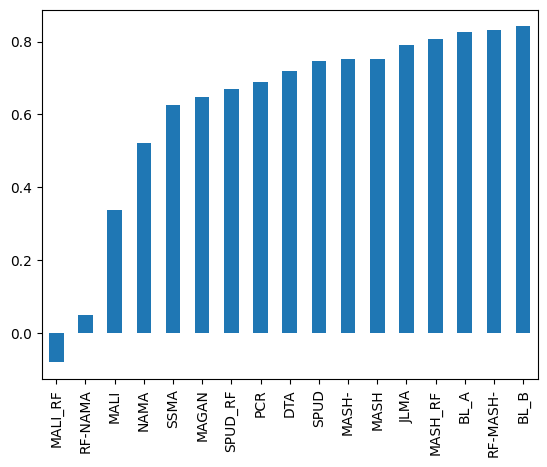

In [11]:
# Visualization
results_df.drop(columns=["csv_file"]).mean(axis = 0).sort_values().plot(kind="bar")

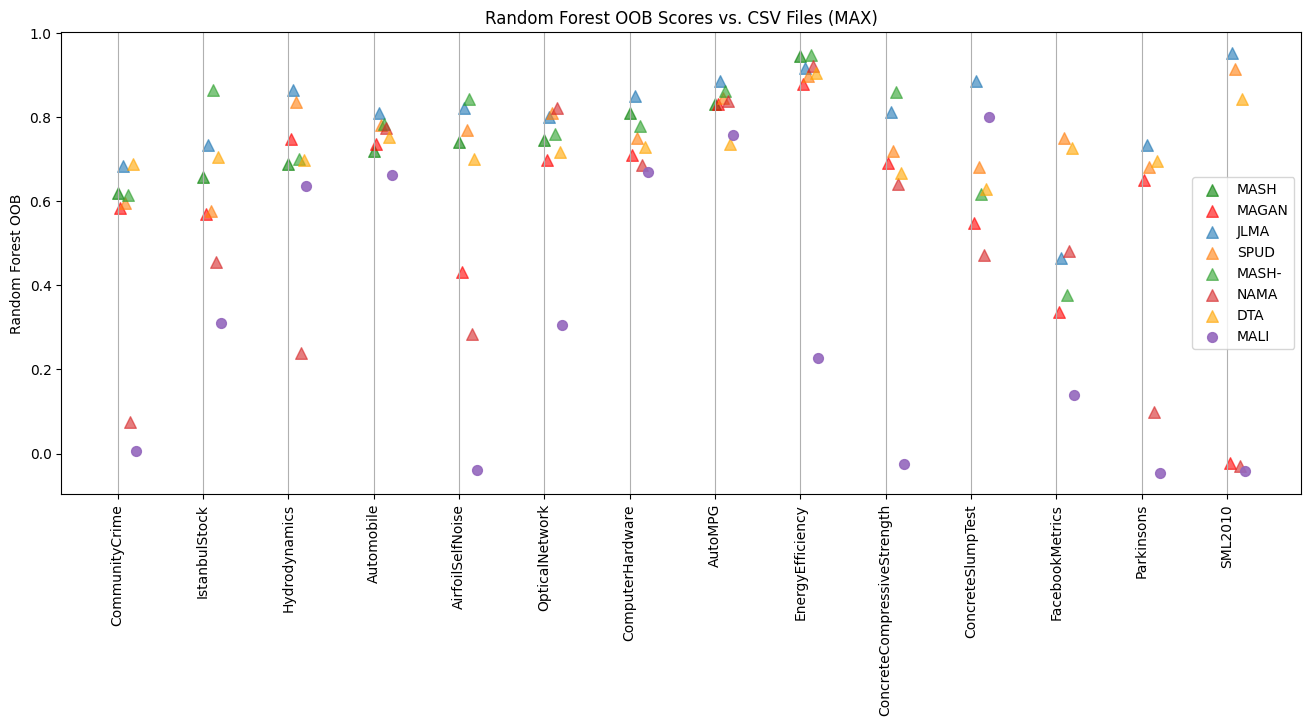

In [12]:
plt_methods_by_CSV_max(df = proc_reg_df, metric = "Random Forest OOB",
                    plot_methods=["MASH", "NAMA", "MALI", "SPUD", "MASH-", "BL_A-B", "BL_B-A", "MAGAN", "JLMA", "DTA"])

In [13]:
proc_reg_df["method"].nunique()

15

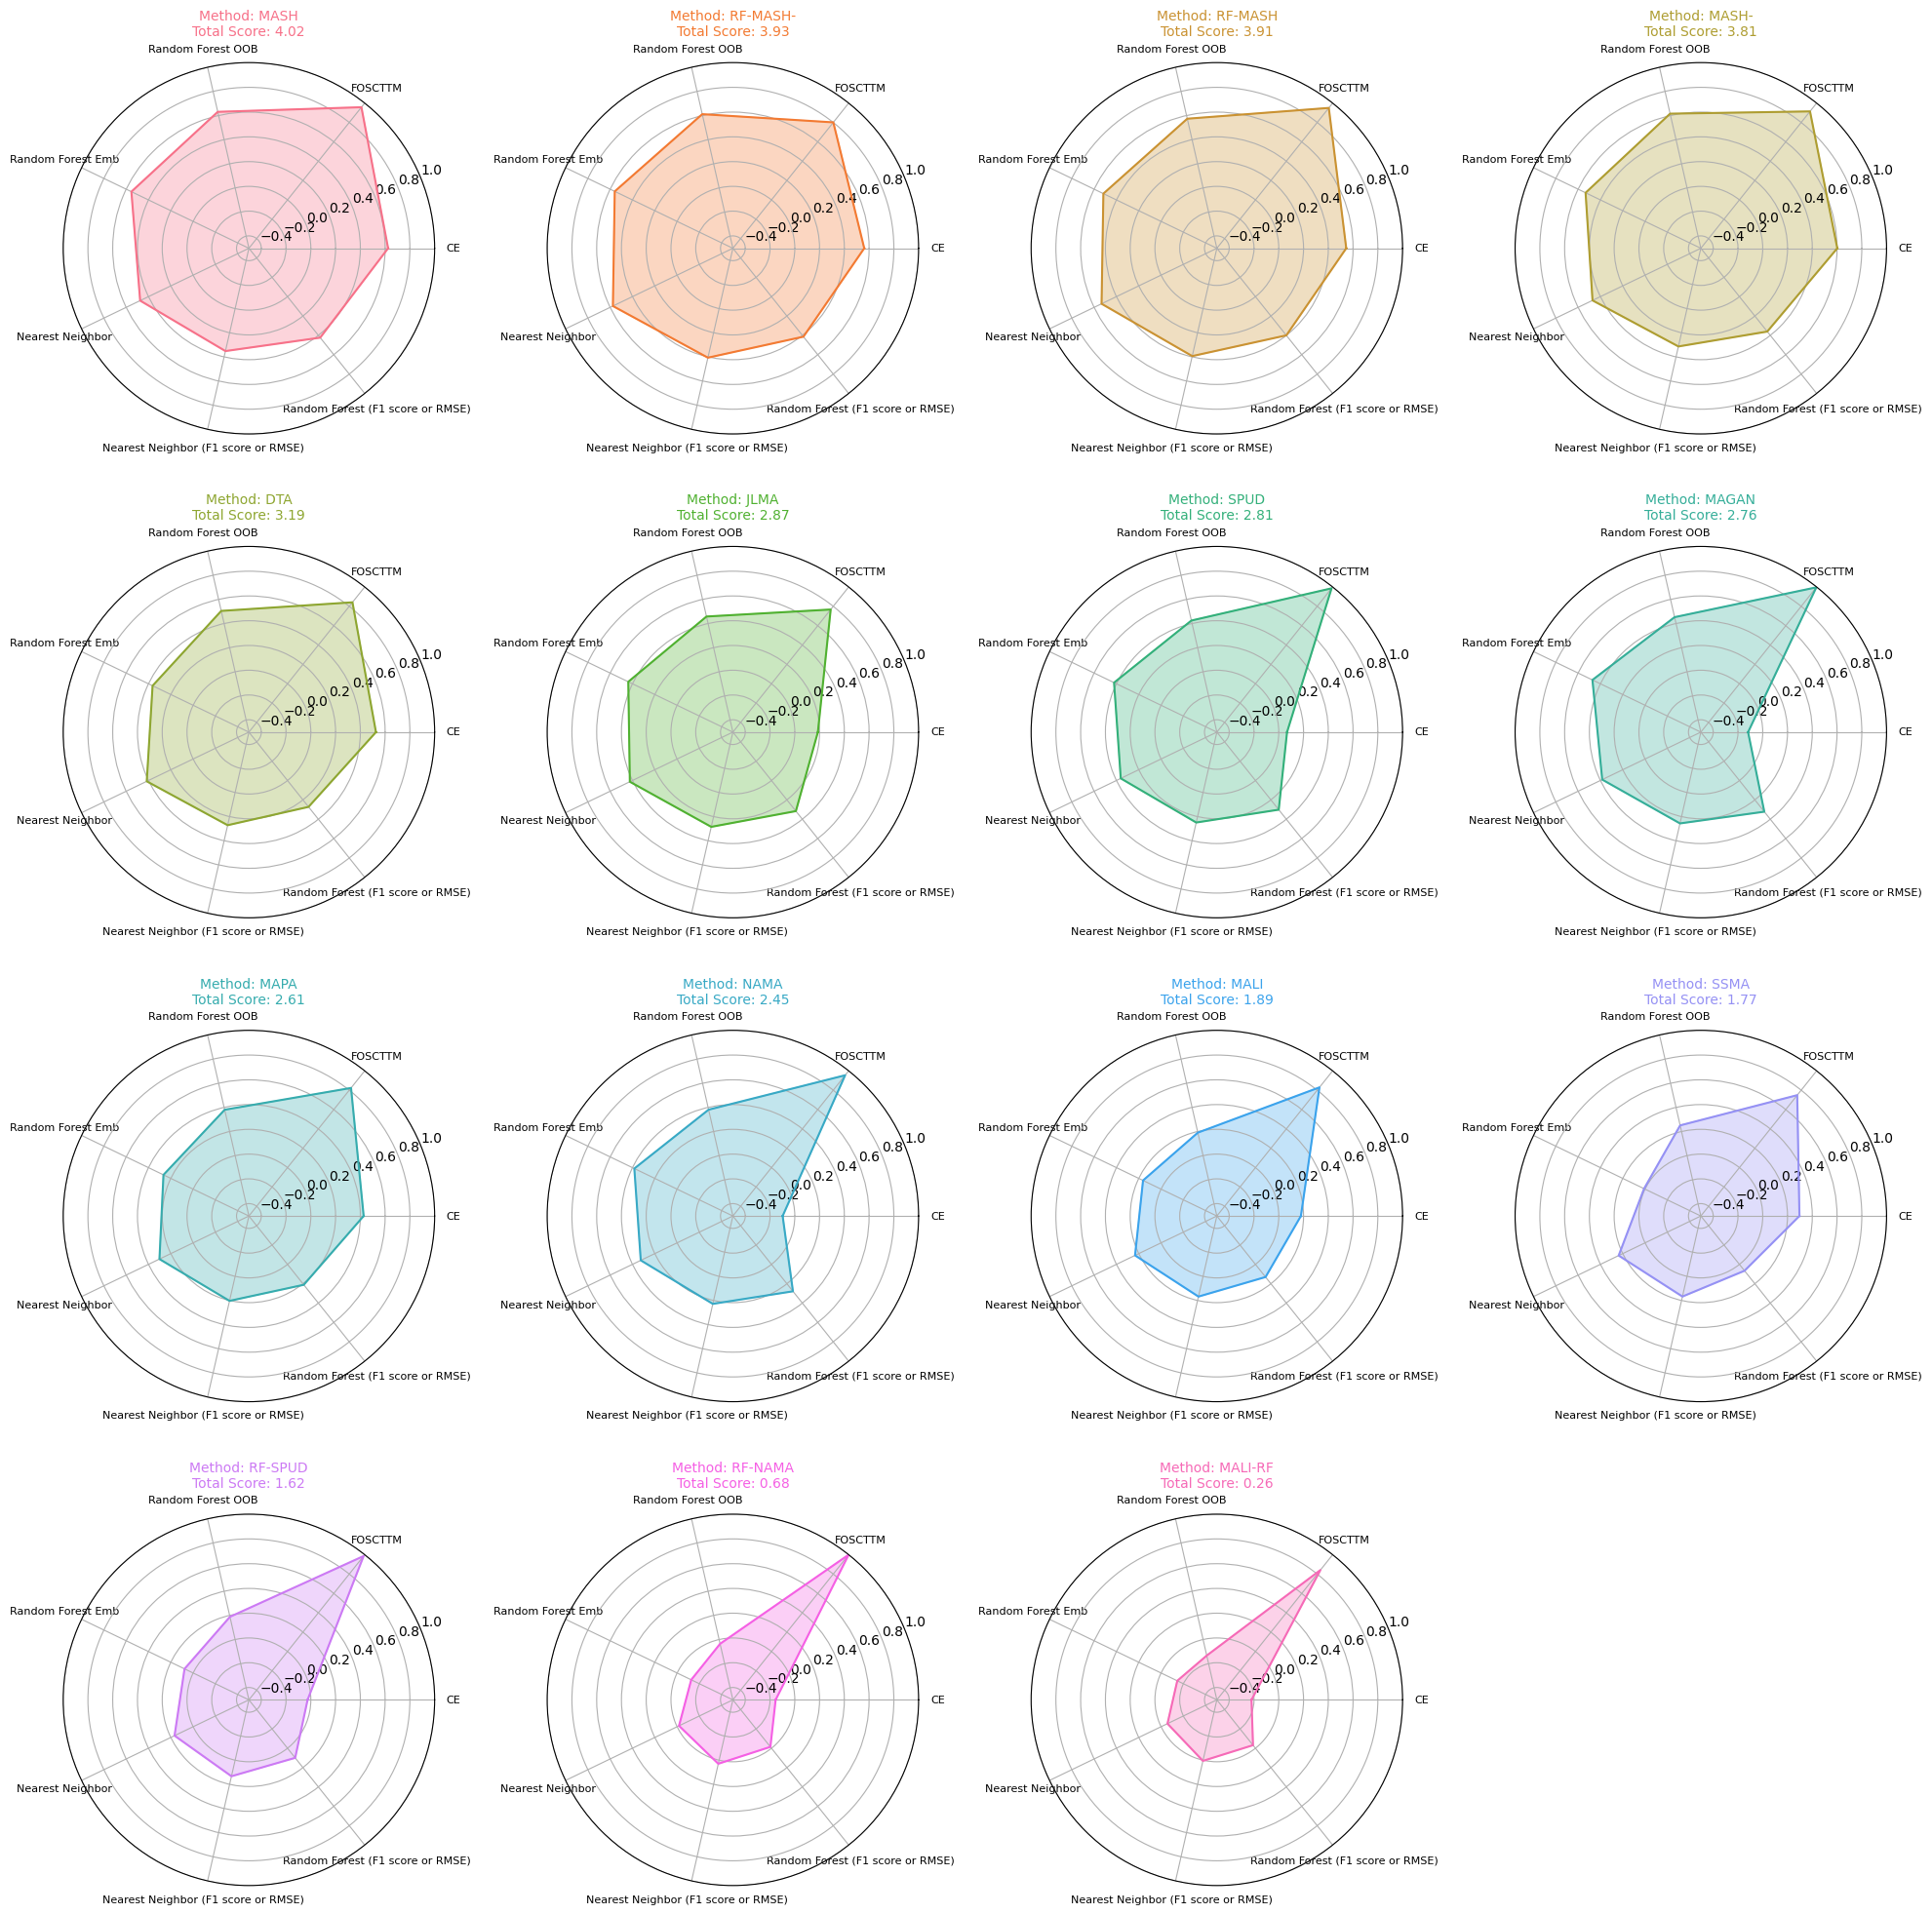

In [14]:
plot_radial(proc_reg_df, ['CE', 'FOSCTTM', 'Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor',
                          'Nearest Neighbor (F1 score or RMSE)', 'Random Forest (F1 score or RMSE)'])

## Veiw GRAE

In [15]:
proc_reg_df.sample(2)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Combined_Metric,A_Classification_Score,B_Classification_Score
133,RF-MASH-,Hydrodynamics,random,0.3,-0.164226,0.413999,0.016945,-0.110983,-0.073403,0.958572,0.974612,"{'42': {'RF-OOB': -0.09371911578497438, 'KNN':...",-0.578225,0.904653,-0.135059
652,DTA,FacebookMetrics,distort,0.3,0.743712,0.001151,0.530325,0.115525,0.316166,0.672522,0.752619,"{'42': {'RF-OOB': 0.963042852281198, 'KNN': 0....",0.742561,0.771436,0.806380


In [16]:
grae_expanded = pd.json_normalize(proc_reg_df['GRAE'])
# Rename columns by dropping the prefix before the dot
grae_expanded.columns = ["Grae-" + col.split(".", 1)[-1] for col in grae_expanded.columns]

# Calculate mean for each unique suffix
mean_scores = grae_expanded.groupby(grae_expanded.columns, axis=1).mean()
mean_scores.sample(2)


,Grae-KNN,Grae-KNN-metric,Grae-RF,Grae-RF-OOB,Grae-RF-metric
662,0.381625,0.613227,0.162773,0.196071,0.704788
360,-0.004518,0.941451,-0.078166,-0.106708,0.975355


In [17]:
full_data = proc_reg_df.drop(columns = ["GRAE"]).join(mean_scores, on = None)
full_data.sample(2)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),Combined_Metric,A_Classification_Score,B_Classification_Score,Grae-KNN,Grae-KNN-metric,Grae-RF,Grae-RF-OOB,Grae-RF-metric
510,RF-SPUD,OpticalNetwork,distort,0.3,-0.384113,0.00004,0.742739,0.423253,0.386446,0.760663,0.739496,-0.384153,0.82835,0.761296,0.73475,0.519165,0.668402,0.780861,0.579011
1130,MAGAN,AirfoilSelfNoise,distort,0.3,-0.645378,0.00000,0.354510,0.354238,0.133933,0.917159,0.791161,-0.645378,0.91496,0.714504,0.19089,0.922863,0.291768,0.317014,0.863060


In [18]:
full_data.columns

Index(['method', 'csv_file', 'split', 'Percent_of_Anchors', 'CE', 'FOSCTTM',
       'Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor',
       'Nearest Neighbor (F1 score or RMSE)',
       'Random Forest (F1 score or RMSE)', 'Combined_Metric',
       'A_Classification_Score', 'B_Classification_Score', 'Grae-KNN',
       'Grae-KNN-metric', 'Grae-RF', 'Grae-RF-OOB', 'Grae-RF-metric'],
      dtype='object')

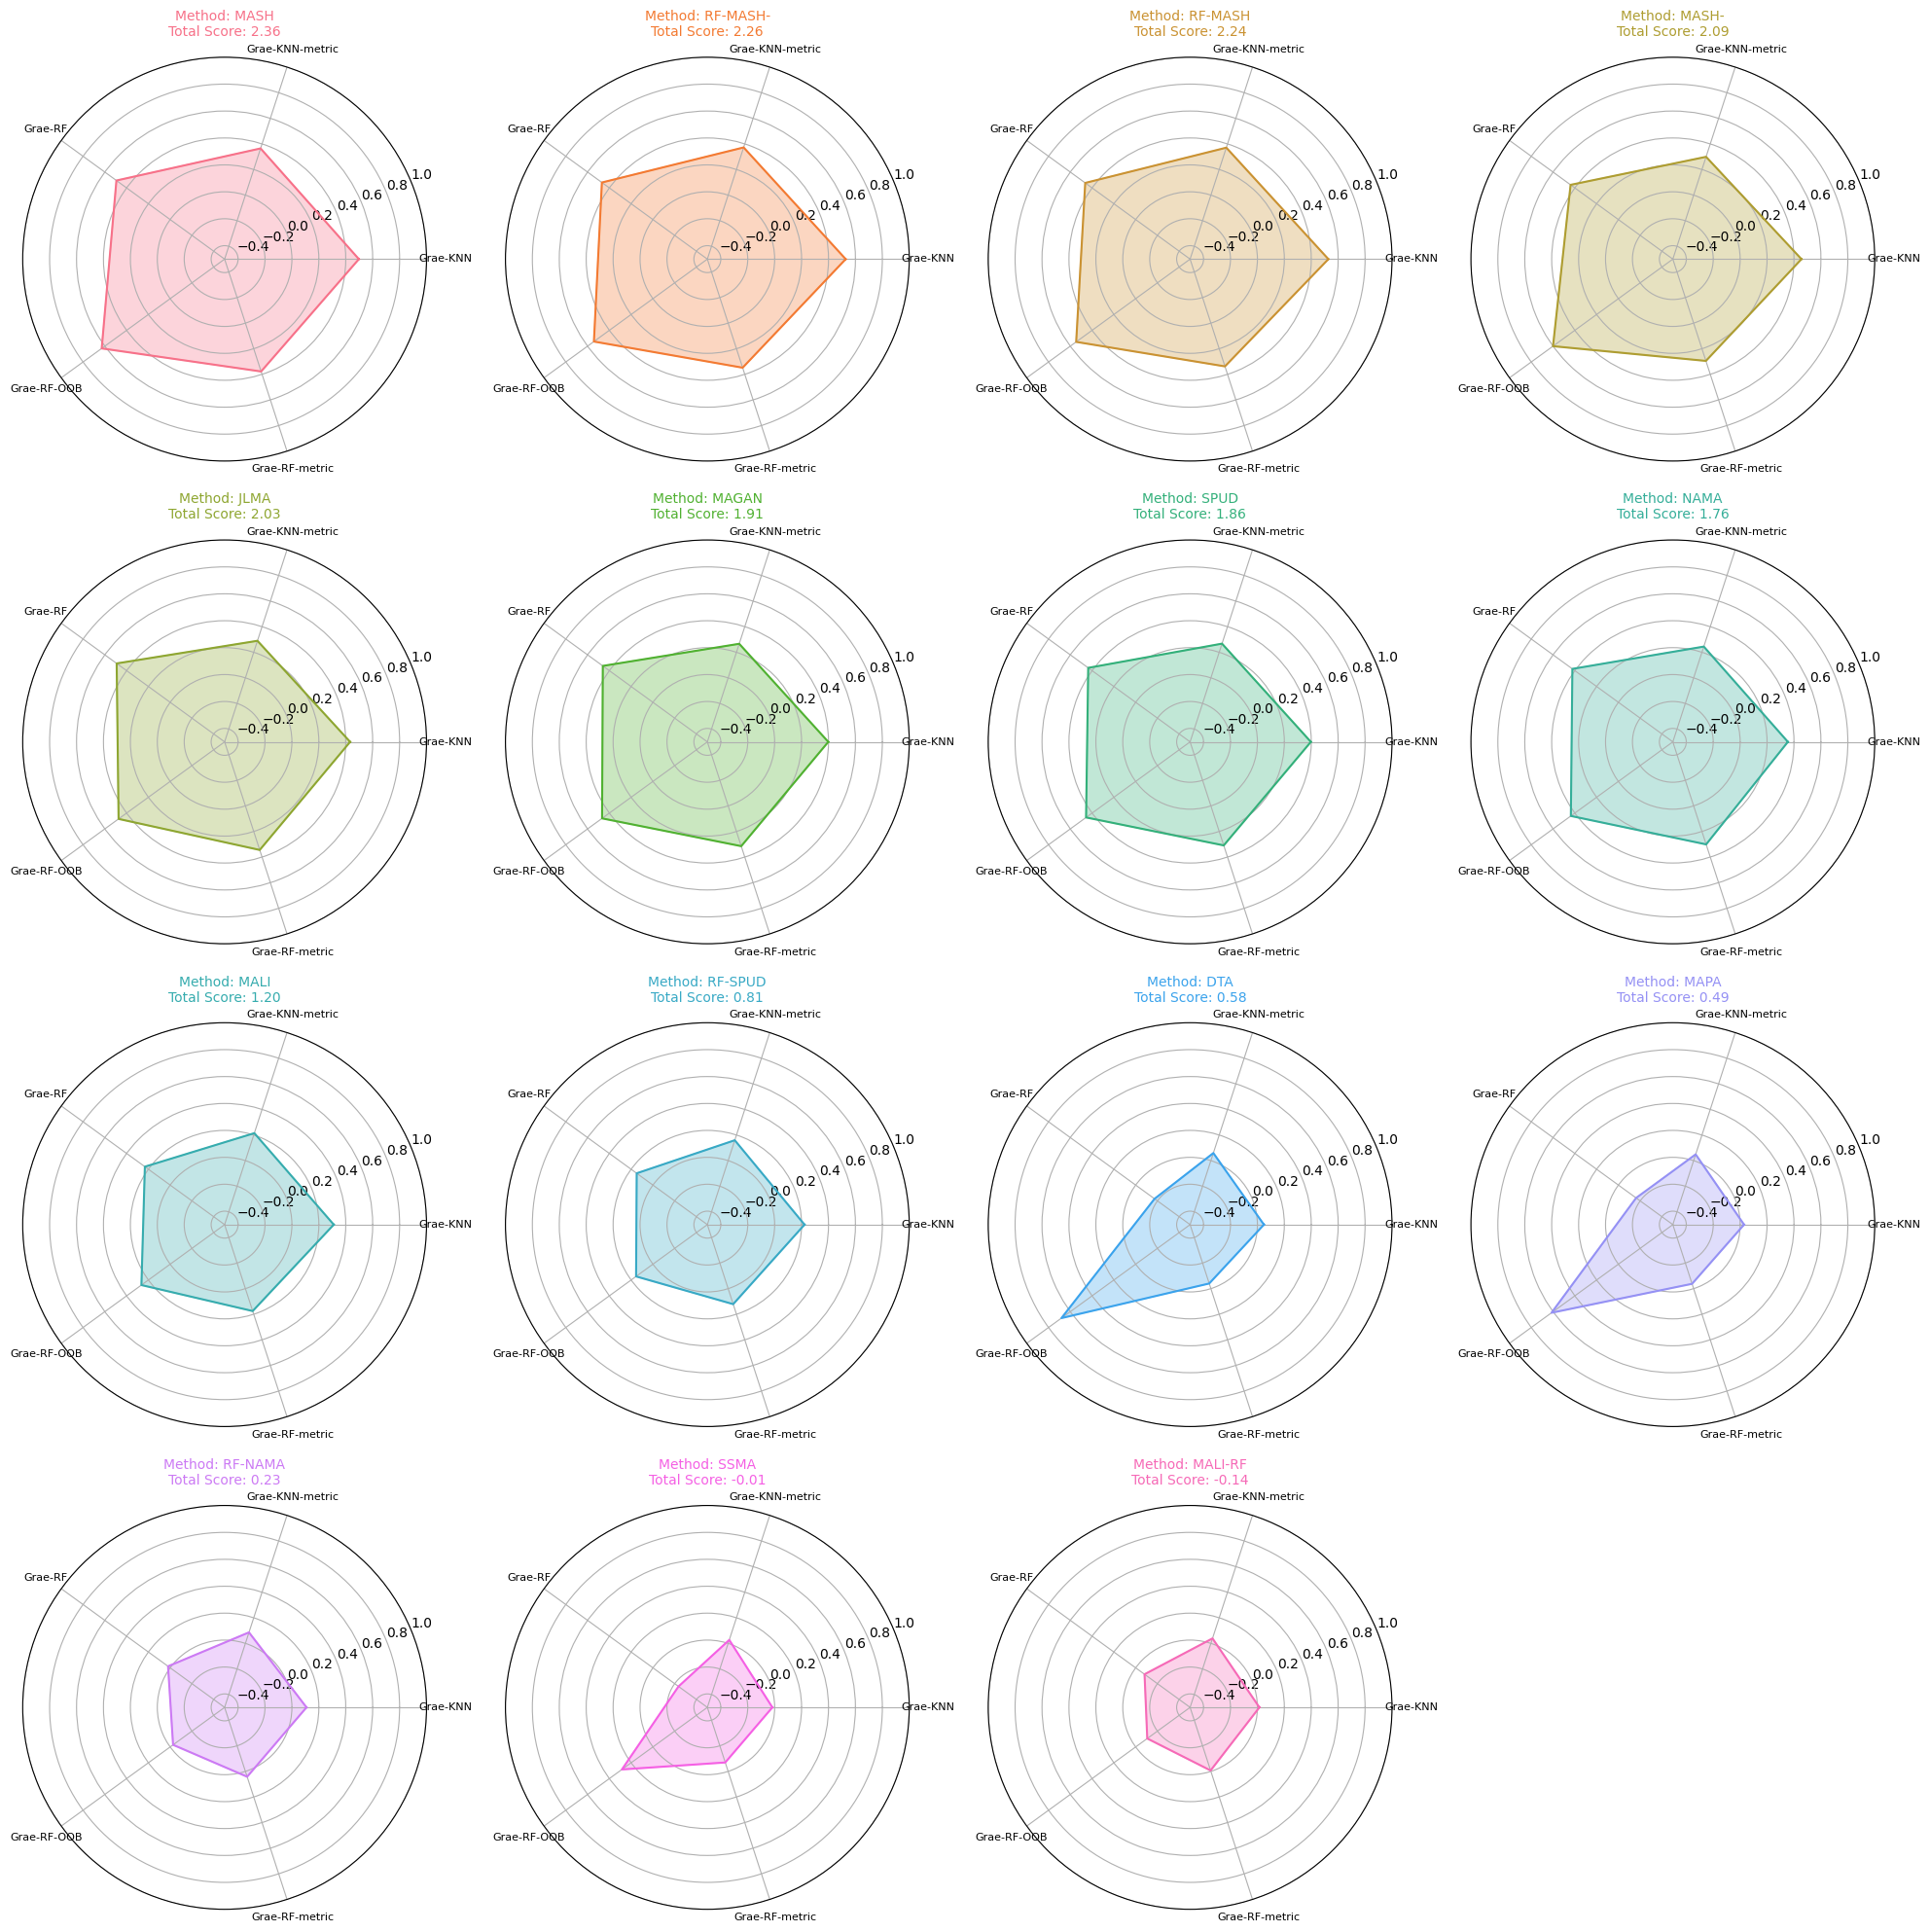

In [19]:
plot_radial(full_data, [#'CE', 'FOSCTTM', 'Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor',
                          #'Nearest Neighbor (F1 score or RMSE)', 'Random Forest (F1 score or RMSE)',
                          'Grae-KNN', 'Grae-KNN-metric', 'Grae-RF', 'Grae-RF-OOB', 'Grae-RF-metric'])

# Compare Grae to RF Extend

In [20]:
full_data.sample(2)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),Combined_Metric,A_Classification_Score,B_Classification_Score,Grae-KNN,Grae-KNN-metric,Grae-RF,Grae-RF-OOB,Grae-RF-metric
550,MASH-,AutoMPG,even,0.3,0.715822,0.086862,0.795112,0.710159,0.709632,0.493241,0.492792,0.628961,0.863749,0.662834,0.699240,0.501990,0.633188,0.817317,0.554379
950,DTA,ConcreteSlumpTest,turn,0.3,0.893098,0.002205,0.629340,0.287801,0.303668,0.780537,0.786176,0.890893,0.807941,0.807941,0.227376,0.797552,0.044765,0.982309,0.886856


In [21]:
group_df = full_data.drop(columns = ["csv_file", "split", "Percent_of_Anchors", "A_Classification_Score", "B_Classification_Score"]).groupby(by = "method").mean()
group_df#.plot( )

,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),Combined_Metric,Grae-KNN,Grae-KNN-metric,Grae-RF,Grae-RF-OOB,Grae-RF-metric
method,,,,,,,,,,,,,
DTA,0.526154,0.158615,0.504363,0.363444,0.415754,0.728815,0.727622,0.367539,0.048444,0.941068,-0.173486,0.681460,1.040180
JLMA,0.186421,0.233162,0.457888,0.437567,0.423654,0.715125,0.683981,-0.046741,0.432510,0.710533,0.491310,0.473705,0.655668
MAGAN,-0.118300,0.003965,0.452572,0.471638,0.383893,0.743620,0.677896,-0.122265,0.398445,0.733898,0.460010,0.466873,0.685366
MALI,0.178812,0.170847,0.190649,0.161692,0.233467,0.832154,0.869305,0.007964,0.310919,0.785421,0.232252,0.263916,0.824874
MALI-RF,-0.220123,0.158884,-0.132888,-0.145124,-0.057266,0.994242,1.031648,-0.379007,0.014820,0.961203,-0.081615,-0.106606,1.007045
MAPA,0.426809,0.177010,0.380295,0.265833,0.301906,0.796659,0.789241,0.249799,0.029179,0.951236,-0.162821,0.614079,1.037673
MASH,0.624225,0.042529,0.630380,0.553479,0.474894,0.648161,0.576544,0.581696,0.497555,0.635375,0.493479,0.628596,0.622256
MASH-,0.602140,0.085892,0.615182,0.533215,0.470874,0.686417,0.639438,0.516247,0.455589,0.700971,0.438788,0.600415,0.704844
NAMA,-0.098088,0.045877,0.380997,0.383521,0.325752,0.771800,0.721855,-0.143965,0.354679,0.755690,0.422478,0.436465,0.699235


In [22]:
group_df.columns, group_df.index

(Index(['CE', 'FOSCTTM', 'Random Forest OOB', 'Random Forest Emb',
        'Nearest Neighbor', 'Nearest Neighbor (F1 score or RMSE)',
        'Random Forest (F1 score or RMSE)', 'Combined_Metric', 'Grae-KNN',
        'Grae-KNN-metric', 'Grae-RF', 'Grae-RF-OOB', 'Grae-RF-metric'],
       dtype='object'),
 Index(['DTA', 'JLMA', 'MAGAN', 'MALI', 'MALI-RF', 'MAPA', 'MASH', 'MASH-',
        'NAMA', 'RF-MASH', 'RF-MASH-', 'RF-NAMA', 'RF-SPUD', 'SPUD', 'SSMA'],
       dtype='object', name='method'))

In [23]:
rf_extend = group_df[['Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor', 'Nearest Neighbor (F1 score or RMSE)', 'Random Forest (F1 score or RMSE)']]  
grae = group_df[['Grae-KNN', 'Grae-KNN-metric', 'Grae-RF', 'Grae-RF-OOB', 'Grae-RF-metric']]

In [24]:
dif_values = rf_extend.values - grae.values

diff_df = pd.DataFrame(dif_values, index = group_df.index, columns = rf_extend.columns)
diff_df["Nearest Neighbor (F1 score or RMSE)"] = diff_df["Nearest Neighbor (F1 score or RMSE)"] * -1
diff_df["Random Forest (F1 score or RMSE)"] = diff_df["Random Forest (F1 score or RMSE)"] * -1 #To ensure that they are consistent on same side.

diff_df

,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE)
method,,,,,
DTA,0.455920,-0.577624,0.589240,-0.047354,0.312557
JLMA,0.025378,-0.272966,-0.067656,-0.241420,-0.028313
MAGAN,0.054127,-0.262260,-0.076117,-0.276747,0.007470
MALI,-0.120270,-0.623730,0.001216,-0.568238,-0.044431
MALI-RF,-0.147707,-1.106327,0.024349,-1.100848,-0.024603
MAPA,0.351116,-0.685403,0.464726,-0.182580,0.248432
MASH,0.132825,-0.081895,-0.018585,-0.019564,0.045712
MASH-,0.159593,-0.167756,0.032086,-0.086002,0.065407
NAMA,0.026318,-0.372168,-0.096726,-0.335334,-0.022620


<Axes: xlabel='method'>

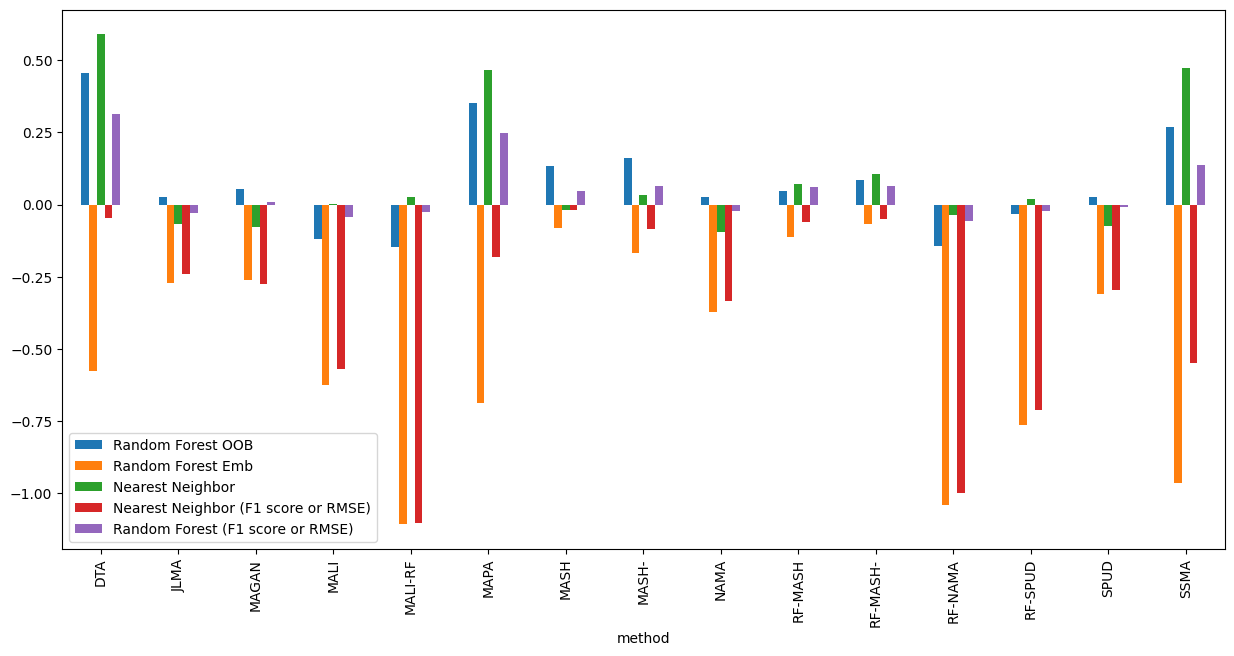

In [25]:
"""
Note that this below isn't really an assesment of how well each method did, but how different Grae is from the non-Grae
Also note that the RMSE is multiplied by -1 so that the bar is on the side where the method is more favorable for it
"""
diff_df.plot(kind = "bar", figsize=(15,7)) # Calculated Non-Grae verisons - Grae_versions

# Veiw Feature variance

In [26]:
reg_df = read_json_files_to_dataframe("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData")

#Average out the random seeds
reg_df["CE"] = [np.mean(list(d.values())) for d in reg_df["CE"].values]
reg_df["FOSCTTM"] = [np.mean(list(d.values())) for d in reg_df["FOSCTTM"].values]
reg_df["Combined_Metric"] = reg_df["CE"] - reg_df["FOSCTTM"]
reg_df.sample(2)

,method,csv_file,split,Percent_of_Anchors,Best_Params,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Parameter STD,Combined_Metric
173,RF-SPUD,Hydrodynamics,distort,0.3,"{'knn': 2, 'OD_method': 'default', 'agg_method...",0.932828,0.000293,"{'42': 0.9461394744657996, '1738': 0.906446832...","{'42': 0.9664380167864569, '1738': 0.874028923...","{'42': 0.9769929695916826, '1738': 0.928654268...","{'42': 0.12195720778104241, '1738': 0.29087711...","{'42': 0.14729940659964488, '1738': 0.38651021...","{'42': {'RF-OOB': 0.9672380913548293, 'KNN': 0...",{},0.932535
494,SPUD,OpticalNetwork,even,0.3,"{'knn': 67, 'OD_method': 'default', 'agg_metho...",-0.038930,0.000461,{'42': 0.6433044132312626},{'42': 0.6180241075470678},{'42': 0.3819862721226469},{'42': 0.794048943640506},{'42': 0.6242609779549576},"{'42': {'RF-OOB': 0.6243062235537211, 'KNN': 0...","{'knn': 0.35204941575675947, 'OD_method': 0.36...",-0.039391


### Spud Parameters on STD

In [27]:
spud_param_df = pd.DataFrame(list(reg_df[reg_df["method"] == "SPUD"]["Parameter STD"].values))
spud_param_df

,knn,OD_method,agg_method
0,0.293544,0.106728,0.328006
1,0.315521,0.136929,0.113630
2,0.299420,0.038904,0.179496
3,0.257186,0.017215,0.020762
4,0.251965,0.055214,0.303049
...,...,...,...
205,0.303843,0.137920,0.086527
206,0.245030,0.052678,0.133933
207,0.589315,0.178530,0.034385
208,0.222530,0.223938,0.006242


<Axes: >

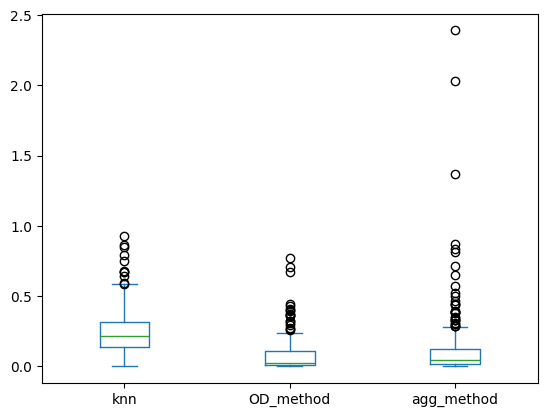

In [28]:
spud_param_df.plot(kind = "box") #This is showing how the std fluctuates between datasets

## MASH Parameters on STD

In [29]:
mash_minus_param_df = pd.DataFrame(list(reg_df[reg_df["method"] == "MASH-"]["Parameter STD"].values))
mash_minus_param_df

,knn,page_rank,DTM,density_normalization
0,0.091198,0.001743,0.056166,0.0
1,0.047936,0.000929,0.009001,0.0
2,0.069745,0.016468,0.034861,0.0
3,0.092476,0.003621,0.057043,0.0
4,0.051415,0.001241,0.002022,0.0
5,0.141600,0.008092,0.227942,0.0
6,0.191730,0.005466,0.008325,0.0
7,0.096132,0.125204,0.018123,0.0
8,0.165853,0.004503,0.059039,0.0
9,0.238521,0.004086,0.118961,0.0


<Axes: >

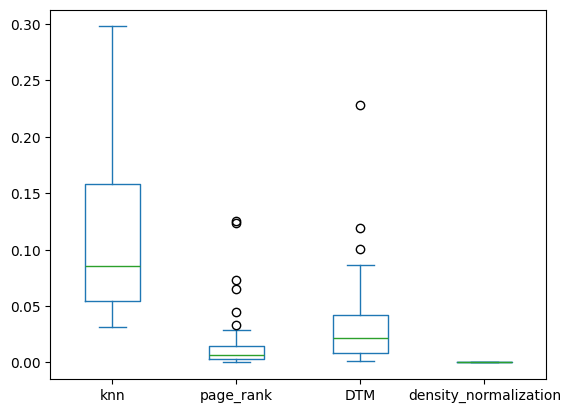

In [30]:
mash_minus_param_df.plot(kind = "box") #This is showing how the std fluctuates between datasets

In [31]:
mash_param_df = pd.DataFrame(list(reg_df[reg_df["method"] == "MASH"]["Parameter STD"].values))
mash_param_df

,connection_limit,threshold,epochs
0,0.034223,0.022946,1.110223e-16
1,0.000000,0.000000,0.000000e+00
2,0.006056,0.032130,0.000000e+00
3,0.000000,0.000000,0.000000e+00
4,0.000000,0.000000,0.000000e+00
5,0.000000,0.000000,1.110223e-16
6,0.000000,0.000000,0.000000e+00
7,0.027127,0.181203,0.000000e+00
8,0.000000,0.071349,0.000000e+00
9,0.009295,0.021120,1.253144e-03


<Axes: >

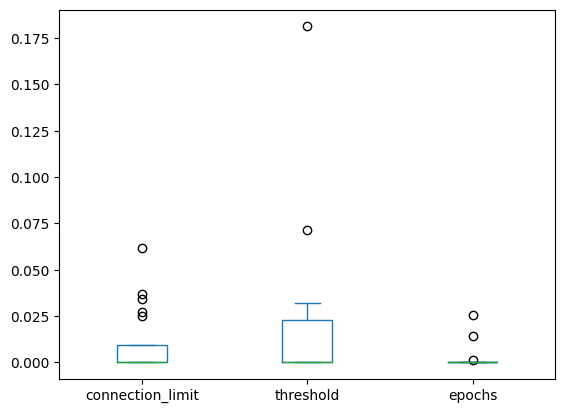

In [32]:
mash_param_df.plot(kind = "box") 